In [1]:
import torch
import torch.nn as nn
import torch.optim as optim


In [2]:
# class Generator(nn.Module):
#     def __init__(self,noise_channels,img_channel):
#         super(Generator,self).__init__()
        
#         self.convt1 = nn.ConvTranspose2d(noise_channels,noise_channels*8,kernel_size=5,stride=2,output_padding=0)
#         self.convt2 = nn.ConvTranspose2d(noise_channels*8,noise_channels*4,kernel_size=5,stride=2,output_padding=0)
#         self.convt3 = nn.ConvTranspose2d(noise_channels*4,1,kernel_size=5,stride=2,padding=1,output_padding=1)
#         # self.convt4 = nn.ConvTranspose2d(noise_channels*2,img_channel,kernel_size=5,stride=2,output_padding=1)
#         self.bn1 = nn.BatchNorm2d(noise_channels*8)
#         self.bn2 = nn.BatchNorm2d(noise_channels*4)
#         self.bn3 = nn.BatchNorm2d(noise_channels*2)
#         self.act = nn.LeakyReLU(0.2)
#         self.act2 = nn.Tanh()
#     def forward(self,x):
#         x = self.act(self.bn1(self.convt1(x)))
#         x = self.act(self.bn2(self.convt2(x)))
#         # x = self.act(self.bn3(self.convt3(x)))
#         x = self.convt3(x)
#         x = self.act2(x)
#         return x

In [3]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        self.model = nn.Sequential(
                nn.ConvTranspose2d(100, 1024, kernel_size=4, stride=1, padding=0),
                nn.BatchNorm2d(1024),
                nn.ReLU(),
                nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1),
                nn.BatchNorm2d(512),
                nn.ReLU(),
                nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
                nn.BatchNorm2d(256),
                nn.ReLU(),
                nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
                nn.BatchNorm2d(128),
                nn.ReLU(),
                nn.ConvTranspose2d(128, 1, kernel_size=4, stride=2, padding=1),
                nn.Tanh(),
            )

    def forward(self, x):
        return self.model(x)

In [4]:
gen = Generator()
a = torch.randn(1,100,1,1)
out = gen(a)
out.size()

torch.Size([1, 1, 64, 64])

In [5]:
# class Discriminator(nn.Module):
#     def __init__(self):
#         super(Discriminator,self).__init__()
#         self.conv1 = nn.Conv2d(1,16,kernel_size=4,stride=2,padding=1)  28
#         self.conv2 = nn.Conv2d(16,32,kernel_size=4,stride=2,padding=1) 14
#         self.conv3 = nn.Conv2d(32,64,kernel_size=4,stride=2,padding=1) 7
#         self.conv4 = nn.Conv2d(64,128,kernel_size=4,stride=2,padding=0) 3
#         self.conv5 = nn.Conv2d(128,256,kernel_size=3,stride=1,padding=0) 
#         self.conv6 = nn.Conv2d(256,512,kernel_size=4,stride=2,padding=1) 
#         self.conv7 = nn.Conv2d(512,1,kernel_size=4,stride=2,padding=1) 
#         self.act = nn.LeakyReLU(0.2)
#         self.bn1 = nn.BatchNorm2d(32)
#         self.bn2 = nn.BatchNorm2d(64)
#         self.bn3 = nn.BatchNorm2d(128)
#         # self.bn4 = nn.BatchNorm2d(256)
#         self.fc1 = nn.Linear(1,1)
        
#         self.sig = nn.Sigmoid()

#     def forward(self,x):
#         x = self.act(self.conv1(x))
#         x = self.act(self.bn1(self.conv2(x)))
#         x = self.act(self.bn2(self.conv3(x)))
#         # x = self.act(self.bn3(self.conv4(x)))
#         x = self.conv5(x)
        
#         x = torch.flatten(x,start_dim=1)
        
#         x = self.sig(self.fc1(x))
#         return x



In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
                nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.2),
                nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(0.2),
                nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
                nn.BatchNorm2d(256),
                nn.LeakyReLU(0.2),
                nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
                nn.BatchNorm2d(512),
                nn.LeakyReLU(0.2),
                nn.Conv2d(512, 1, kernel_size=4, stride=2, padding=0),
                nn.Sigmoid()
            )

    def forward(self, x):
        return self.model(x)


In [7]:
a = torch.randn(3,1,64,64)
disc = Discriminator()
out = disc(a)
out.size()

torch.Size([3, 1, 1, 1])

In [8]:
from torchvision import transforms,datasets
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
img_size = 64
transform = transforms.Compose([transforms.Resize((64,64)),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

dataset = datasets.MNIST('./',transform=transform, download= True)

In [9]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

In [10]:
dataloader = torch.utils.data.DataLoader(dataset,batch_size=128,shuffle=True)


In [11]:
torch.cuda.is_available()

True

In [12]:
gen.cuda()
disc.cuda()
betas=(0.5,0.999)
optimg = optim.Adam(gen.parameters(),lr=0.002,betas=betas)
optimd = optim.Adam(disc.parameters(),lr=0.002,betas=betas)

criterion = nn.BCELoss()

epoch0
 d_loss1.4463
 g_loss10.5965


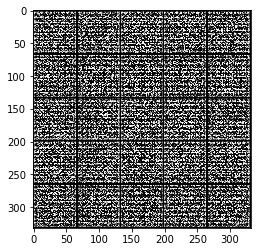

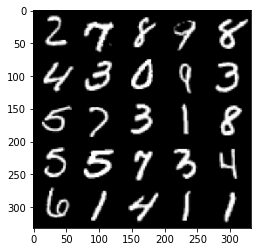

epoch1
 d_loss0.0000
 g_loss13.6997


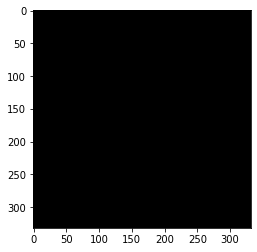

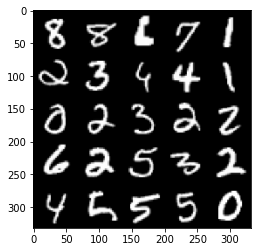

In [ ]:
epoches = 15

for e in range(epoches):
    for idx,(images,_) in enumerate(dataloader):
        images = images.cuda()
        rlabels = torch.ones(images.size(0)).cuda()
        flabels = torch.zeros(images.size(0)).cuda()
        ro = disc(images).reshape(-1)
        
        bct = len(images)
        rl = criterion(ro,rlabels)
        noise = torch.randn(bct,100,1,1).cuda()
        fake = gen(noise)
        fo = disc(fake.detach()).reshape(-1)
        fl = criterion(fo,flabels)
        d_loss = rl + fl
        optimd.zero_grad()
        d_loss.backward()
        optimd.step()

        g_out = disc(fake).reshape(-1)
        g_loss = criterion(g_out,rlabels)
        optimg.zero_grad
        g_loss.backward()
        optimg.step()

        if not idx%1000:
            print(f'epoch{e}\n d_loss{d_loss.item():.4f}\n g_loss{g_loss.item():.4f}')
            show_tensor_images(fake)
            show_tensor_images(images)

In [ ]:
!nvidia-smi